<h2> Importing Needed Libraries </h2>

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.io as pio
pio.renderers.default='browser'
import warnings
warnings.filterwarnings('ignore')

<h2> Reading Dataset and Getting Information </h2>

In [6]:
df = pd.read_csv('C:/Users/ABC/OneDrive/Desktop/GitHub_Project/jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [4]:
df.describe(exclude=np.number)

,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9355,9355,9355,9355,9355,9355,9355,9355,9355
unique,125,10,11,83,4,4,3,70,3
top,Data Engineer,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
freq,2195,3014,8591,8086,6709,9310,5730,8132,8448


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


<h2> Data Cleaning </h2>

In [6]:
# Checking for Null Values
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [7]:
# Checking for Duplicate Values
df.duplicated().any()

True

In [8]:
# Removing Duplicate Values
df.drop_duplicates(inplace=True)

In [9]:
# Dropping Column as we already have another Salary Column which is in USD Currency
df.drop('salary', inplace=True, axis=1)

In [10]:
# We Cannot determine Salary of Employees if we have 1 or 2 values for a particular location
# Dropping values where where location count is either 1 or 2

company_location_outliers = df['company_location'].value_counts().isin([1, 2])
company_location_outliers

company_location
United States     False
United Kingdom    False
Canada            False
Germany           False
Spain             False
                  ...  
Gibraltar          True
Ecuador            True
Andorra            True
Mauritius          True
Malta              True
Name: count, Length: 70, dtype: bool

In [11]:
indexes = company_location_outliers.iloc[np.where(company_location_outliers == True)].index

In [12]:
indexes = df[df['company_location'].isin(indexes)].index

In [13]:
df1 = df.drop(index=indexes)

In [14]:
df1.shape

(5305, 11)

<H2> Average Salary as per Work Year</H2>

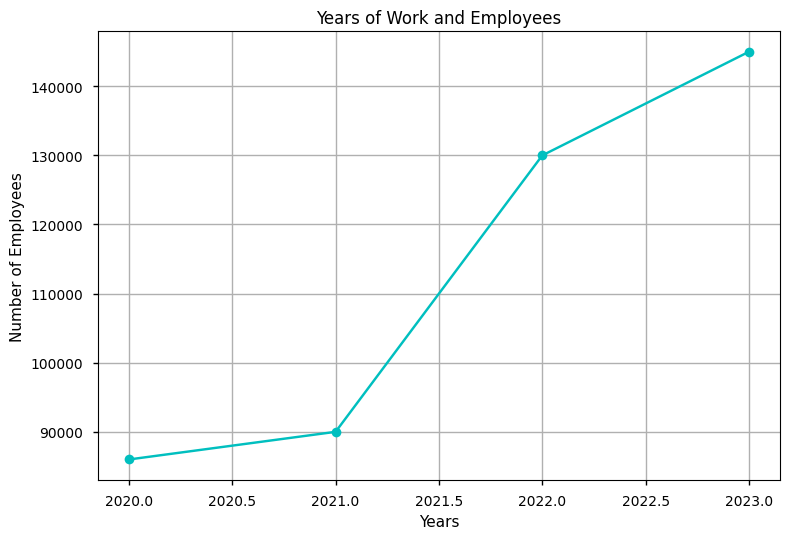

In [15]:
%matplotlib inline

df_with_work_year = df1.groupby('work_year')['salary_in_usd'].median()

plt.style.use('seaborn-v0_8-notebook')
plt.plot(df_with_work_year, color='c', marker='o')
plt.xlabel('Years')
plt.ylabel('Number of Employees')

plt.title('Years of Work and Employees')
plt.tight_layout()
plt.grid(True)

plt.show()

<H2> Employee Salary As per Experience Level</H2>

In [16]:
df1['experience_level'].unique()

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

In [17]:
df_experience_salary = df[['experience_level', 'salary_in_usd']]
df_experience_salary.sort_values(by='experience_level', inplace=True)
df_experience_salary.set_index('experience_level', inplace=True)
df_experience_salary = df_experience_salary.unstack().droplevel(level=0)
df_experience_salary

C:\Users\ABC\AppData\Local\Temp\ipykernel_10744\2233180712.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



experience_level
Entry-level    100000
Entry-level     30000
Entry-level     28368
Entry-level     43187
Entry-level     48915
                ...  
Senior         132000
Senior         198000
Senior         255000
Senior          82920
Senior         230000
Length: 5341, dtype: int64

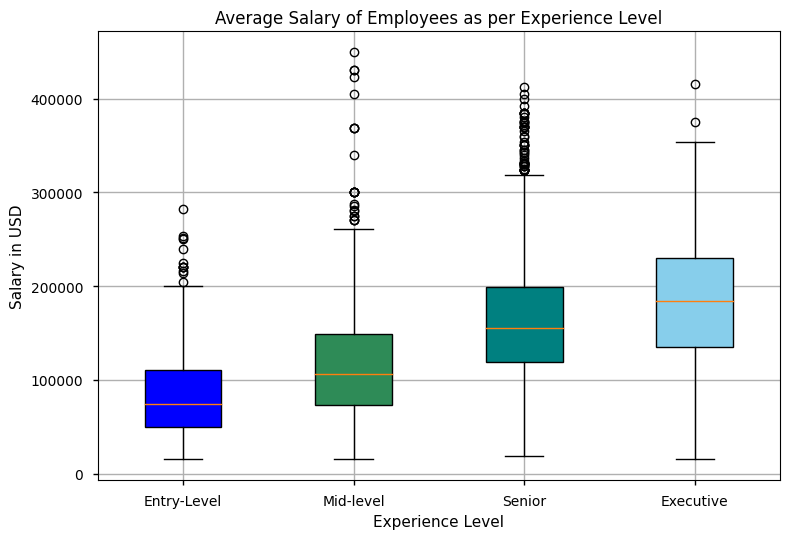

In [18]:
color = ['blue', 'seagreen', 'teal', 'skyblue']

boxes = plt.boxplot([df_experience_salary['Entry-level'], df_experience_salary['Mid-level'], df_experience_salary['Senior'],
                    df_experience_salary['Executive']], labels=['Entry-Level', 'Mid-level', 'Senior', 'Executive'], 
                    vert=True, patch_artist=True)

for patch, color in zip(boxes['boxes'], color):
    patch.set_facecolor(color)
    
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Average Salary of Employees as per Experience Level')
plt.tight_layout()
plt.grid(True)
plt.show()

<H2> Employment Type</H2>

In [19]:
df_employment_type = df1['employment_type'].value_counts()

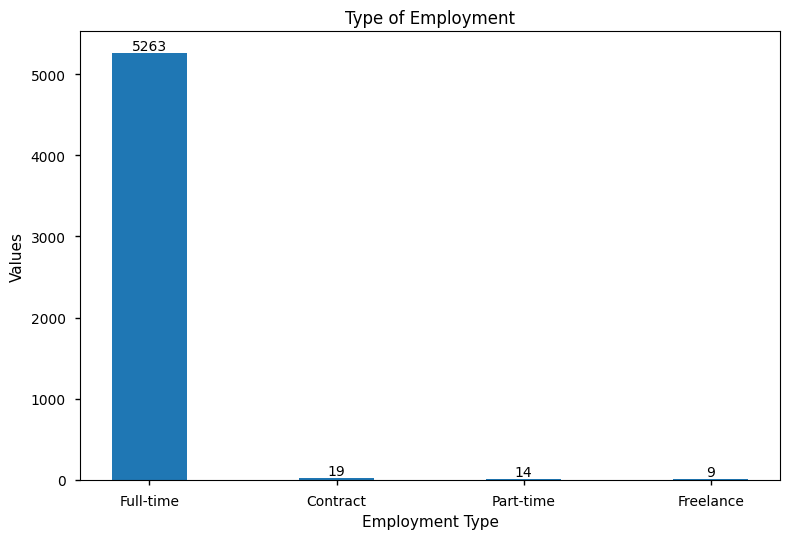

In [20]:
employment_bar_chart = plt.bar(df_employment_type.index, df_employment_type.values, width=0.4)

plt.bar_label(employment_bar_chart, fmt='{:.0f}')
plt.xlabel('Employment Type')
plt.ylabel('Values')
plt.title('Type of Employment')

plt.tight_layout()
plt.show()

<H2> Work Setting</H2>

In [21]:
df_work_setting = df1['work_setting'].value_counts()
df_work_setting

work_setting
In-person    2902
Remote       2221
Hybrid        182
Name: count, dtype: int64

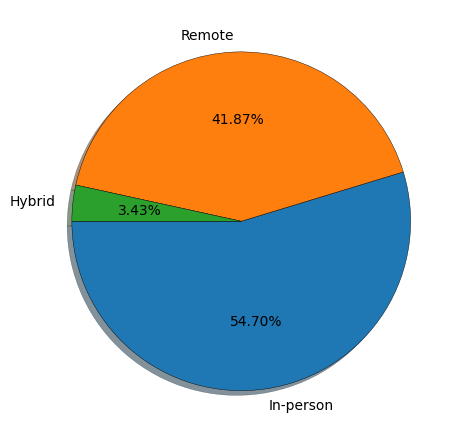

In [22]:
plt.pie(df_work_setting.values, labels=df_work_setting.index, 
        shadow=True, autopct='%1.2f%%', startangle=180, wedgeprops={'edgecolor': 'black'})

plt.show()

<H2> <B> <I> Average Salary as per Company Size </I> </B> </H2>

In [23]:
df_company_size = df1[['company_size', 'salary_in_usd']]
df_company_size

,company_size,salary_in_usd
0,L,95012
1,M,186000
2,M,81800
3,M,212000
4,M,93300
...,...,...
9350,L,165000
9351,L,412000
9352,L,151000
9353,S,105000


In [24]:
df_company_size.sort_values(by='company_size', inplace=True)
df_company_size.set_index('company_size', inplace=True)
df_company_size = df_company_size.unstack().droplevel(level=0)

In [25]:
df_company_size

company_size
L     95012
L     68000
L     59888
L    135000
L    122638
      ...  
S     15966
S     95746
S    140000
S    160000
S     30000
Length: 5305, dtype: int64

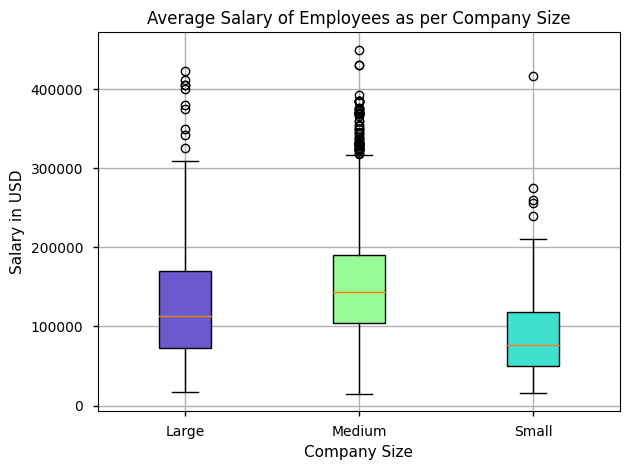

In [26]:
color = ['slateblue', 'palegreen', 'turquoise']

plt.figure(figsize=(6.4, 4.8))
boxes = plt.boxplot([df_company_size['L'], df_company_size['M'], df_company_size['S']], labels=['Large', 'Medium', 'Small'], 
                    vert=True, patch_artist=True)

for patch, color in zip(boxes['boxes'], color):
    patch.set_facecolor(color)
    
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.title('Average Salary of Employees as per Company Size')
plt.tight_layout()
plt.grid(True)
plt.show()

In [27]:
df1['job_category'].unique()

array(['Data Engineering', 'Data Architecture and Modeling',
       'Data Science and Research', 'Machine Learning and AI',
       'Data Analysis', 'Leadership and Management',
       'BI and Visualization', 'Data Quality and Operations',
       'Data Management and Strategy', 'Cloud and Database'], dtype=object)

In [28]:
salary_by_job_category = df1.groupby('job_category')['salary_in_usd'].median().sort_values()

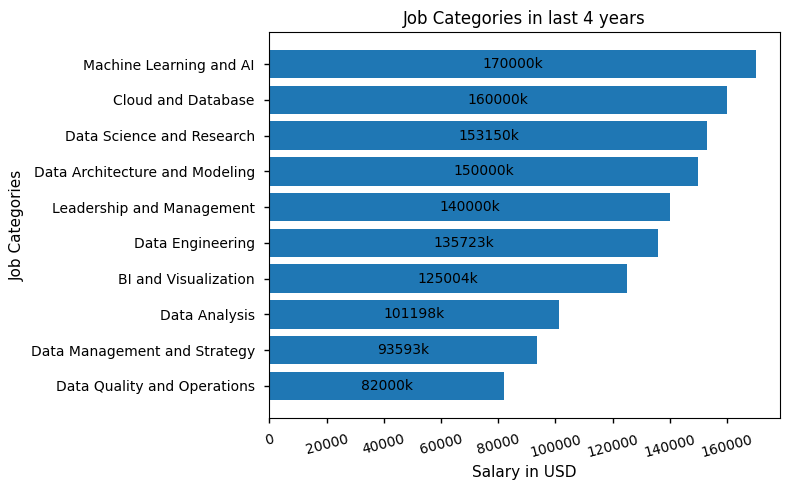

In [29]:
plt.figure(figsize=(8, 5))

bar_container = plt.barh(salary_by_job_category.index, salary_by_job_category.values)
plt.bar_label(bar_container, fmt='{0:.0f}k', label_type='center')

plt.xlabel('Salary in USD')
plt.ylabel('Job Categories')
plt.title('Job Categories in last 4 years')
plt.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

<H2> Average Salary of Employee In Data Industry</H2>

In [30]:
df['job_title'] = df['job_title'].str.replace('ML Engineer', 'Machine Learning Engineer')
df['job_title'] = df['job_title'].str.replace('Data Science Director', 'Director of Data Science')

df2 = df.groupby(['work_year', 'job_title'])['salary_in_usd'].median()
df2 = df2.unstack(level=0)

df2.dropna(axis=0, thresh=3, inplace=True)
df2.sort_values(by=2023, ascending=False, inplace=True)

df3 = df2.iloc[4:14]

In [31]:
df3

work_year,2020,2021,2022,2023
job_title,,,,
Machine Learning Engineer,138000.0,81872.0,140125.0,183625.0
Data Science Lead,NaN,150000.0,165000.0,179050.0
Machine Learning Scientist,260000.0,225000.0,148500.0,175500.0
Data Science Manager,190200.0,163000.0,180967.5,175000.0
Research Scientist,246000.0,66904.5,144000.0,175000.0
Machine Learning Infrastructure Engineer,50180.0,195000.0,148800.0,165400.0
Principal Data Scientist,148261.0,220000.0,155499.0,160000.0
Data Architect,NaN,170000.0,167500.0,157250.0
Data Scientist,68428.0,87738.0,134500.0,156400.0


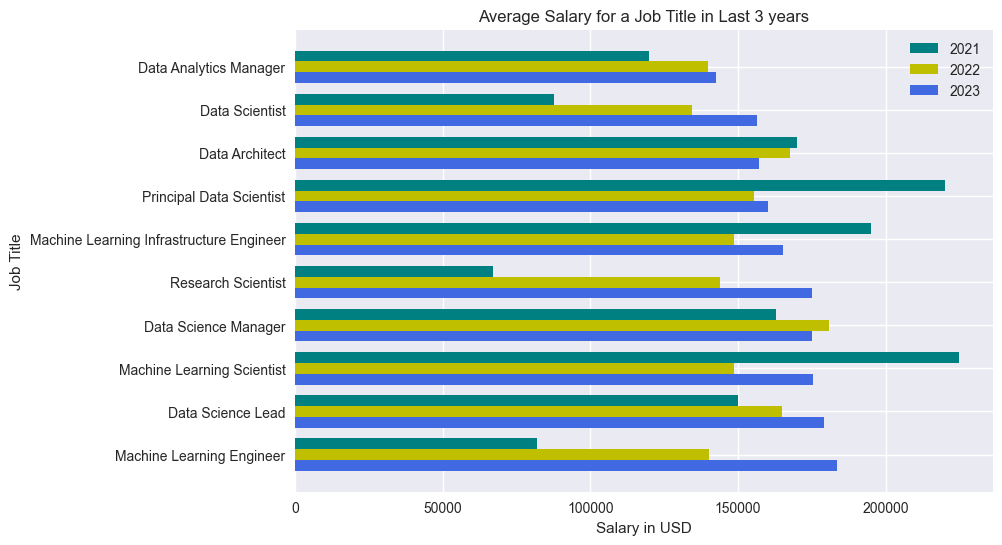

In [37]:
width= 0.25
y_indexes = np.arange(10)

plt.figure(figsize=(9, 6))
plt.barh(y_indexes + width, df3[2021], width, color='teal', label='2021')
plt.barh(y_indexes, df3[2022], width, color='y', label='2022')
plt.barh(y_indexes - width, df3[2023], width, color='royalblue', label='2023')

plt.yticks(ticks=y_indexes, labels=df3.index)
plt.ylabel('Job Title')
plt.xlabel('Salary in USD')
plt.title('Average Salary for a Job Title in Last 3 years')

plt.legend()
plt.show()

<H2> <B> <I> Average Salary in USD Across Georgraphial Regions</I> </B> </H2>

In [12]:
figure = px.scatter_geo(df, locations='employee_residence', locationmode='country names', color='salary_in_usd', 
                     hover_name='employee_residence', title='Salary by Employee Residence')

figure.show()

In [13]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'browser'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [22]:
pio.renderers.default= "png"

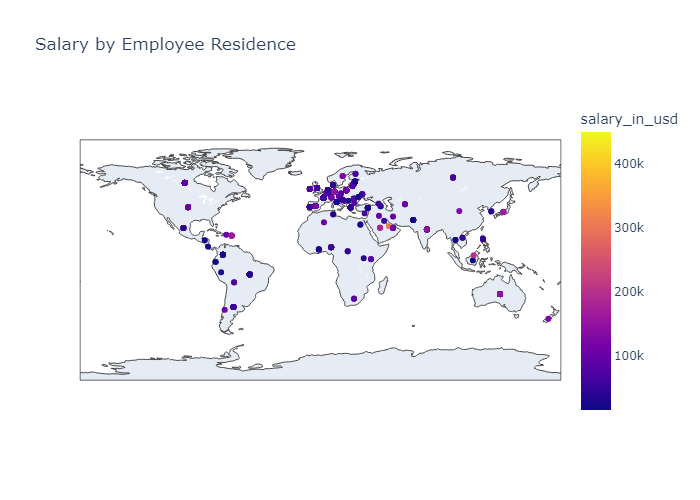

In [23]:
figure = px.scatter_geo(df, locations='employee_residence', locationmode='country names', color='salary_in_usd', 
                     hover_name='employee_residence', title='Salary by Employee Residence')
figure.show()